## BitCoin Market Sentiment Analysis by Rehmah

## **Objective**

Analyze how trading behavior (profitability, risk, volume, leverage) aligns or diverges from
overall market sentiment (fear vs greed). Identify hidden trends or signals that could influence
smarter trading strategies.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Studying the Data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSC DSAI 2/Internship/ds_Rehmah/csv_files/historical_data.csv')
df.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12


| **Column Name**      | **Meaning**                                                              |
| -------------------- | ------------------------------------------------------------------------ |
| **Account**          | Name or ID of the user/trader's account executing the trade.             |
| **Coin**             | The cryptocurrency being traded (e.g., BTC, ETH, SOL, etc.).             |
| **Execution Price**  | The price at which the trade was executed.                               |
| **Size Tokens**      | Quantity of the cryptocurrency bought or sold (in tokens).               |
| **Size USD**         | Value of the trade in USD (i.e., `Execution Price × Size Tokens`).       |
| **Side**             | Indicates whether it was a **buy** or **sell** order.                    |
| **Timestamp IST**    | Date and time of the trade in Indian Standard Time (IST).                |
| **Start Position**   | The position (e.g., size) before the trade was executed.                 |
| **Direction**        | Likely shows **Long** or **Short** (direction of the position).          |
| **Closed PnL**       | Profit or Loss realized when the position was closed.                    |
| **Transaction Hash** | A unique identifier for the transaction on the blockchain (if on-chain). |
| **Order ID**         | Unique identifier for the order from the exchange or trading system.     |
| **Crossed**          | Indicates if the trade **crossed the spread** (i.e., market order).      |
| **Fee**              | Transaction or trading fee incurred.                                     |
| **Trade ID**         | Unique ID for the trade; may differ from Order ID if order was partial.  |
| **Timestamp**        | UTC timestamp or system-generated timestamp (could differ from IST one). |


In [3]:
df.size

3379584

In [4]:
df.dtypes

,0
Account,object
Coin,object
Execution Price,float64
Size Tokens,float64
Size USD,float64
Side,object
Timestamp IST,object
Start Position,float64
Direction,object
Closed PnL,float64


In [5]:
df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [6]:
df['Crossed'].unique()

array([ True, False])

In [7]:
for risk, count in df['Crossed'].value_counts().items():
    print(risk, count)

True 128403
False 82821


In [8]:
fg= pd.read_csv('/content/drive/MyDrive/MSC DSAI 2/Internship/ds_Rehmah/csv_files/fear_greed_index.csv')
fg.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


| Column Name        | Meaning                                                                                                                 |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------- |
| **timestamp**      | Exact date and time                         |
| **value**          | The sentiment index                  |
| **classification** | Categorical label derived from the sentiment value  |
| **date**           | Calendar date corresponding to the `timestamp`                          |


In [9]:
fg['classification'].unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [10]:
fg.size

10576

In [11]:
fg.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


**Observations So Far**:

* Both Datasets have Date and Time Stamp, making a connecting link to make analysis
* Profitability can be studied using 'Side' and 'PnL' columns.
* Risk can be studied using 'Crossed' column.
* Volume can be studied using 'Size USD' and 'Side' columns.

## Merging Datasets on Date and Time stamp

In [12]:
df['Timestamp IST'] = pd.to_datetime(df['Timestamp IST'], dayfirst=True)

df['date'] = df['Timestamp IST'].dt.date

fg['date'] = pd.to_datetime(fg['date']).dt.date

df_merged = pd.merge(df, fg[['date', 'classification']], on='date', how='left')

df_merged.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed


## Checking for Profitability with Fear/Greed

 **Profit**: If a coin is bought and it closed on a profit thats a sign of future upward trend. Similarly if coin is sold and it closed on a loss that means the investor saved themselves from a potential loss.

 **Loss**: If a coin is bought and it closed on a loss thats a sign of future downward trend. Similarly if coin is sold and it closed on a profit that means the investor missed out opportunity of profit

In [13]:
df_merged['Profitability'] = np.where(
    ((df_merged['Direction'] == 'Buy') & (df_merged['Closed PnL'] > 0)) |
    ((df_merged['Direction'] == 'Sell') & (df_merged['Closed PnL'] < 0)),
    'Profit',
    'Loss'
)

In [14]:
for pl, count in df_merged['Profitability'].value_counts().items():
    print(pl, count)

Loss 207583
Profit 3641


DAMNNN the loss numbers are BIG

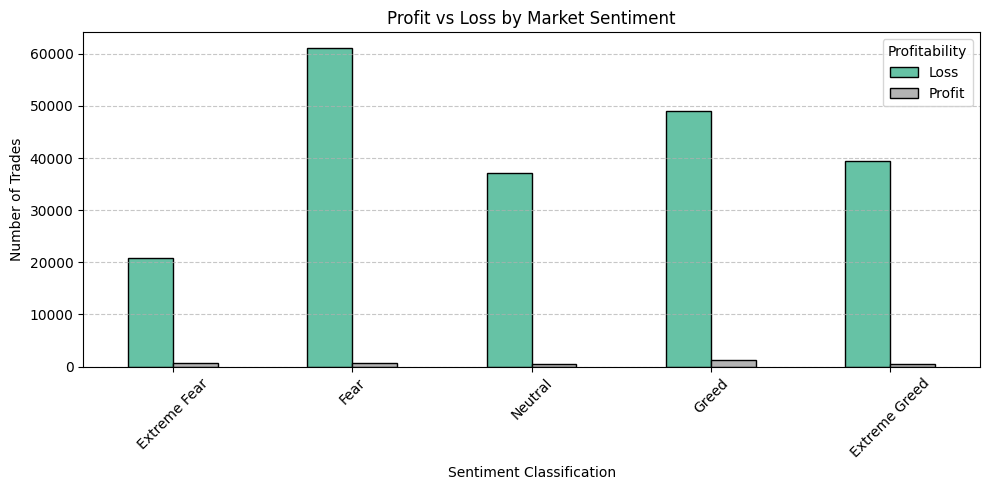

In [15]:
counts = df_merged.groupby('classification')['Profitability'].value_counts().unstack(fill_value=0)

order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
counts = counts.reindex(order)

counts.plot(kind='bar', figsize=(10, 5), colormap='Set2', edgecolor='black')

plt.title('Profit vs Loss by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Profitability')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Analysis**: Although the difference between is profits and losses is huge, the graph shows that fearful investors have endured the highest loss and greedy investors have gained the most profit. But greedy investors are also 2nd highest in loss endurers.

Extremely Fearful investors have endured the least loss but also gained the least profit

This leads us to believe that while extreme greed and extreme fear may not work while investing in coins, but having determination and taking a few risks will make one thrive in the coin market

**Note**: This Analysis is purely on the basis of closing price of the same day the transaction took place, thus the analysis is not solid and requires more studies into the transaction history of each coin to be considered Valid.

## Checking for Risk with Fear/Greed

If Crossed = True, the trader crossed the spread, meaning they hit a market order (taker). This makes them Risk takers.

If Crossed = False, they posted a limit order (maker), waiting for the market to come to them. This lets us know the investor investes sensibly with a plan in mind.

In [16]:
df_merged['Risk'] = np.where(
    (df_merged['Crossed'] == True), #& (df_merged['Side'] == 'Buy'),
    True,
    False
)

In [17]:
for risk, count in df_merged['Risk'].value_counts().items():
    print(risk, count)

True 128403
False 82821


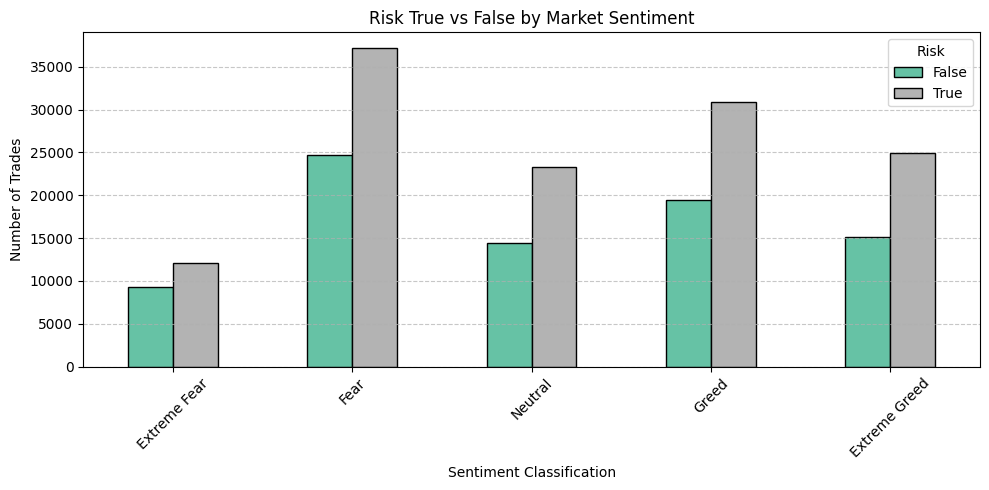

In [18]:
counts = df_merged.groupby('classification')['Risk'].value_counts().unstack(fill_value=0)

order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']
counts = counts.reindex(order)

counts.plot(kind='bar', figsize=(10, 5), colormap='Set2', edgecolor='black')

plt.title('Risk True vs False by Market Sentiment')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Risk')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Analysis**: This graph is making it really clear that fearful or greedy all investors are in for risk when investing in coins.

Extreme Fear has the lowest Risk numbers which fits their narrative, Greedy investors being the 2nd highest risk takers which fits them as well.

The shocking discovery of this chart is that fearful investors are the highest risk takers.

This is not an appropriate logic to look at this as this chart is only based on whether or not a transaction was market or limit, But it gives an idea about the Risk taking tendency of the investor. Many fearful investors might just plan a price in their mind and execute it on spot. So these statistics are not reliable. To get more reliable take on risk takers would give by analysing the transaction history of an investor.

## Checking for Volume with Fear/Greed

This is to check the volumes (high/low) in which fearful or greedy investors buy or sell.

High and Low Volumes are segregated using mean of the transaction size ie 5639.451, which was seen above in the dataset study.

In [19]:
df_merged['Volume'] = np.where(
    df_merged['Size USD'] >= 5639.451,
    'High',
    'Low'
)
for vol, count in df_merged['Volume'].value_counts().items():
    print(vol, count)

Low 183490
High 27734


In [20]:
high  = df_merged[((df_merged['Side'] == 'BUY')  & (df_merged['Volume'] == 'High')) | ((df_merged['Side'] == 'SELL') & (df_merged['Volume'] == 'High'))]
low  = df_merged[((df_merged['Side'] == 'BUY')  & (df_merged['Volume'] == 'Low')) | ((df_merged['Side'] == 'SELL') & (df_merged['Volume'] == 'Low'))]
print("High Volume:", len(high))
print("Low Volume:", len(low))

High Volume: 27734
Low Volume: 183490


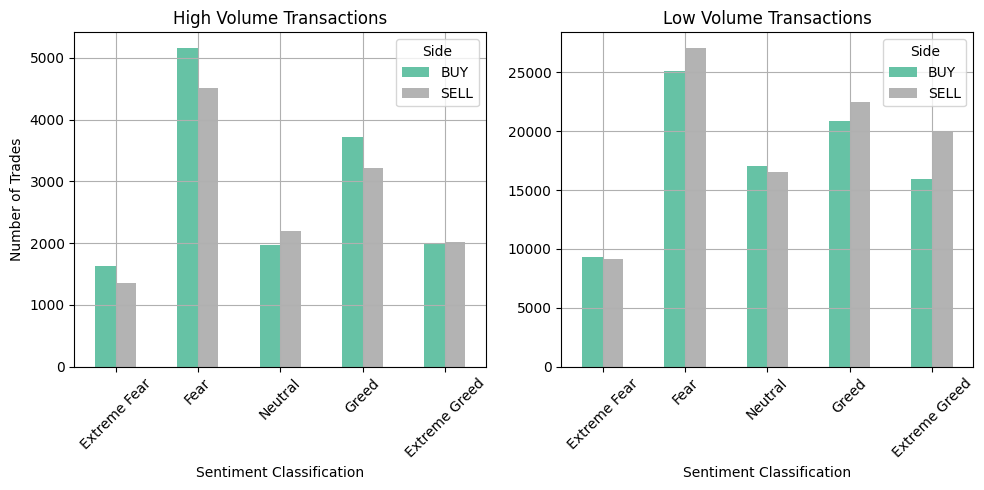

In [21]:
order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

high_counts = high.value_counts(['classification', 'Side']).unstack(fill_value=0).reindex(order)

low_counts = low.value_counts(['classification', 'Side']).unstack(fill_value=0).reindex(order)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
high_counts.plot(kind='bar', colormap='Set2', ax=plt.gca())
plt.title('High Volume Transactions')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.legend(title='Side')
plt.grid()

plt.subplot(1, 2, 2)
low_counts.plot(kind='bar', colormap='Set2', ax=plt.gca())
plt.title('Low Volume Transactions')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=45)
plt.legend(title='Side')
plt.grid()

plt.tight_layout()
plt.show()

**Analysis**:

Extremely Fearful Investors have the lowest number of investments for both High and Low Volumes.

Apart from that, all types of investors have higher transaction numbers in low volume data.

While Fearful Investors Invest the most, they also sell the most. As they save themselves from potential future losses, their sell transactions are the highest.

Neutral Investors tend to work more with low volumes as compared to high volumes as they do desire profits but not at the cost of any risks.

## Trading Strategies Learned

* Greedy investors may gain the most but also might loose the most. A greedy strategy works for Investors who are in for the High Risk. Greedy investors might realise a miss out on opportunities because of their on-spot decisions.
* Fearful investors may seem like they are risk takers but their transactions are planned and they stick to it. They also may miss out on opportunities due to fear of loss

**The best approach to invest in coins is to be greedy enough to be able to take some losses and fearful enough to not loose too much**.

**A planned but flexible line of transaction that flows along with the market trends can make one thrive in the coin market**.